# Microsoft camera trap MegaDetector

**This notebook is meant to be used on Google Colaboratory and may not work on a typical Jupyter notebook (not tested)**

**Don't forget to enable GPU, it process images 10x + faster than CPU**

Execution -> Change type of execution -> pick GPU

## Clone the Microsoft/CameraTraps repository & Install dependencies



In [0]:
!git clone https://github.com/microsoft/CameraTraps.git

In [0]:
!pip install -r /content/CameraTraps/requirements.txt

## Download trained model

In [0]:
!wget https://lilablobssc.blob.core.windows.net/models/camera_traps/megadetector/megadetector_v3.pb

## Import required librairies

In [0]:
import os # File management
import glob # File management
from pathlib import Path # File management
import urllib.request # Download image
import matplotlib.pyplot as plt # Visualization
import matplotlib.image as mpimg # Image visualization

## Download and display image (from Google Image)
https://github.com/hardikvasa/google-images-download

In [0]:
!pip install google_images_download
from google_images_download import google_images_download   #importing the library

In [0]:
response = google_images_download.googleimagesdownload()   #class instantiation
keywords = ['wolf camera trap', 'lynx camera trap']
download_dir = "/content/downloads"
arguments = {"keywords":",".join(keywords), "limit":20, "silent_mode":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function

In [0]:
def display_images(path = ".", start_index_of_images_to_display = 0, figsize = (30, 30)):
  """
  Function to display a group of images from a directory
  """
  images = list(Path(path).rglob("*.[jJ][pP][gG]")) + list(Path(path).rglob("*.[pP][nN][gG]"))
  # videos = list(Path(path).rglob("*.[aA][vV][iI]")) + list(Path(path).rglob("*.[mM][pP][4]")) # In case we need a list of videos ... 
  w=10
  h=10
  fig=plt.figure(figsize=figsize)
  columns = 4
  rows = 5
  for i in range(1, columns*rows +1):
    try:
      img = plt.imread(images[start_index_of_images_to_display + i - 1])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
    except Exception as e:
      pass
  plt.show()

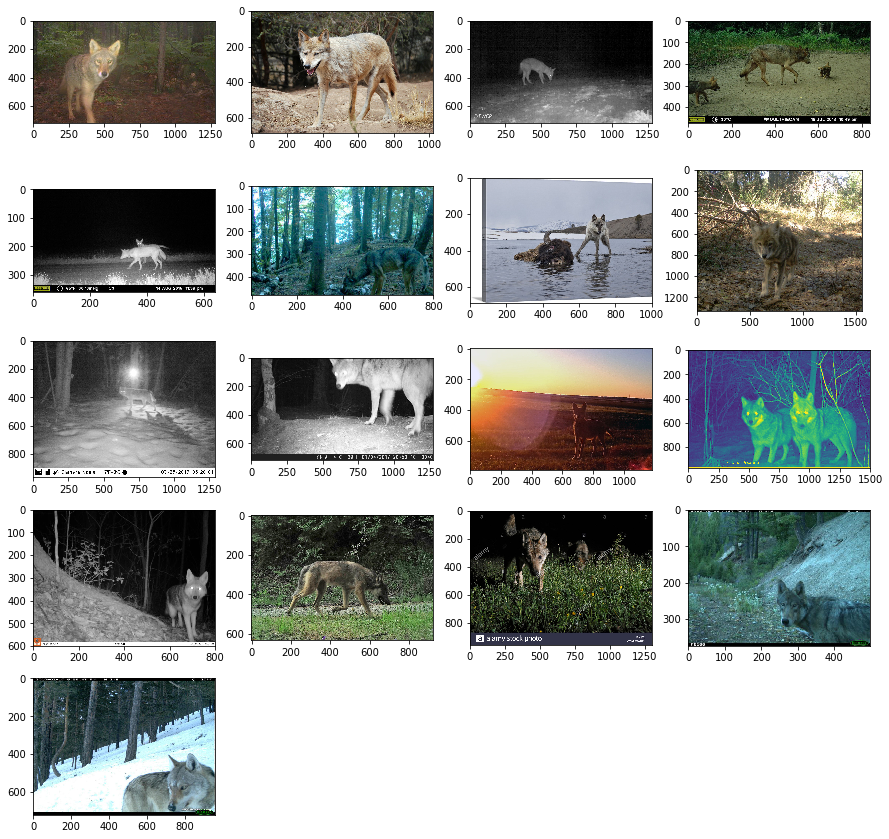

In [0]:
display_images(os.path.join(download_dir, keywords[0]), figsize=(15,15))

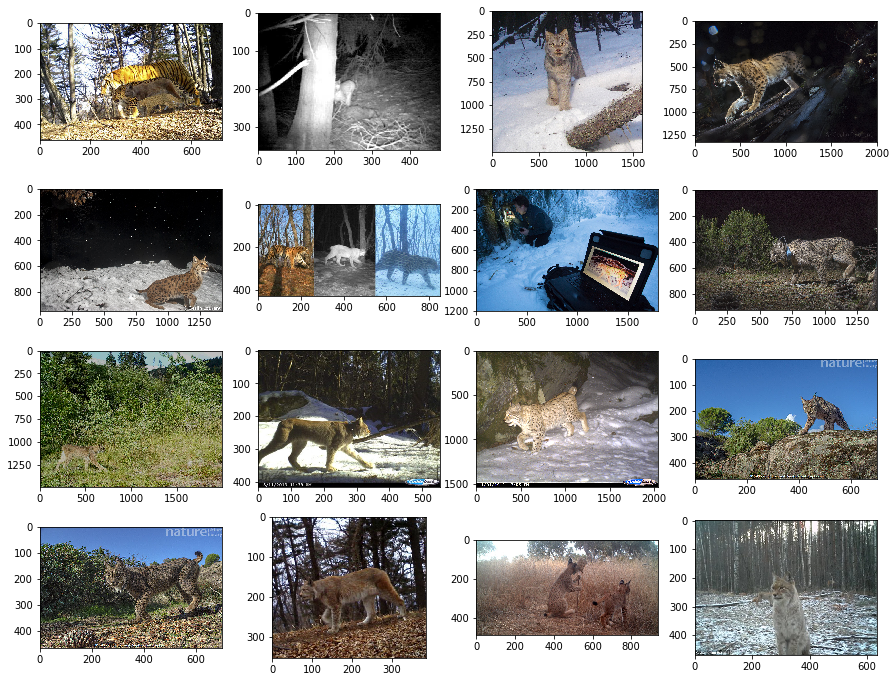

In [0]:
display_images(os.path.join(download_dir, keywords[1]), figsize=(15,15))

In [0]:
#!rm -R $download_dir/* # In case you want to clear the downloads directory

## Run the detector
https://github.com/Microsoft/CameraTraps/blob/master/detection/run_tf_detector.py

In [0]:
!python /content/CameraTraps/detection/run_tf_detector.py /content/megadetector_v3.pb --imageDir $download_dir/wolf\ camera\ trap --outputDir /content/output/wolf

W0703 08:29:15.237204 139713122723712 deprecation_wrapper.py:119] From /content/CameraTraps/detection/run_tf_detector.py:60: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0703 08:29:15.237546 139713122723712 deprecation_wrapper.py:119] From /content/CameraTraps/detection/run_tf_detector.py:60: The name tf.logging.ERROR is deprecated. Please use tf.compat.v1.logging.ERROR instead.

Running detector on 20 images
Loading model...
Loaded model in 8.26 seconds
Loading images...
100% 20/20 [00:00<00:00, 59.50it/s]
Finished loading 20 file(s) in 0.34 seconds
Running detector...
20it [10:39, 31.99s/it]
Finished running detector on 20 images in 10 minutes and 40.02 seconds (40.03 seconds for the first image, 31.58 seconds for each subsequent image)
Rendering output...
100% 20/20 [00:00<00:00, 82565.04it/s]
Rendered output in 3.66 seconds


In [0]:
!python /content/CameraTraps/detection/run_tf_detector.py /content/megadetector_v3.pb --imageDir $download_dir/lynx\ camera\ trap --outputDir /content/output/lynx

W0703 08:41:16.083181 140073829906304 deprecation_wrapper.py:119] From /content/CameraTraps/detection/run_tf_detector.py:60: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0703 08:41:16.083561 140073829906304 deprecation_wrapper.py:119] From /content/CameraTraps/detection/run_tf_detector.py:60: The name tf.logging.ERROR is deprecated. Please use tf.compat.v1.logging.ERROR instead.

Running detector on 20 images
Loading model...
Loaded model in 7.95 seconds
Loading images...
100% 20/20 [00:00<00:00, 43.91it/s]
Finished loading 20 file(s) in 0.46 seconds
Running detector...
20it [10:21, 31.07s/it]
Finished running detector on 20 images in 10 minutes and 21.57 seconds (40.1 seconds for the first image, 30.6 seconds for each subsequent image)
Rendering output...
100% 20/20 [00:00<00:00, 81049.35it/s]
Rendered output in 4.61 seconds


## Display results

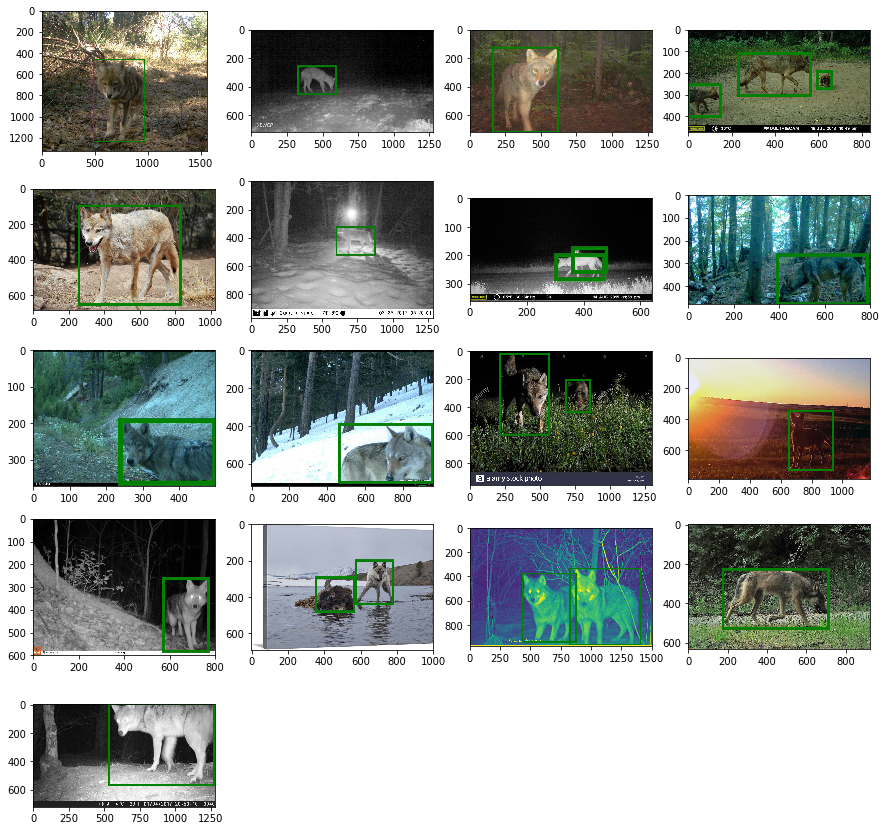

In [0]:
display_images("/content/output/wolf", figsize = (15,15))

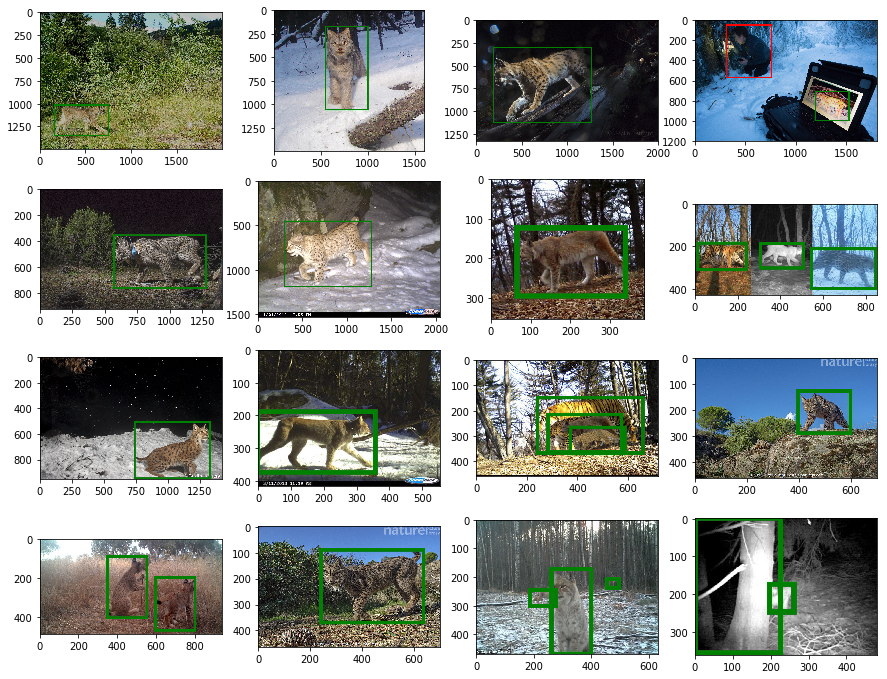

In [0]:
display_images("/content/output/lynx", figsize = (15,15))